In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class_labels']
df = pd.read_csv('iris.data', names=columns)
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Class_labels
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
df.describe

<bound method NDFrame.describe of      Sepal length  Sepal width  Petal length  Petal width    Class_labels
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [36]:
print(df.columns)

Index(['Sepal length', 'Sepal width', 'Petal length', 'Petal width',
       'Class_labels'],
      dtype='object')


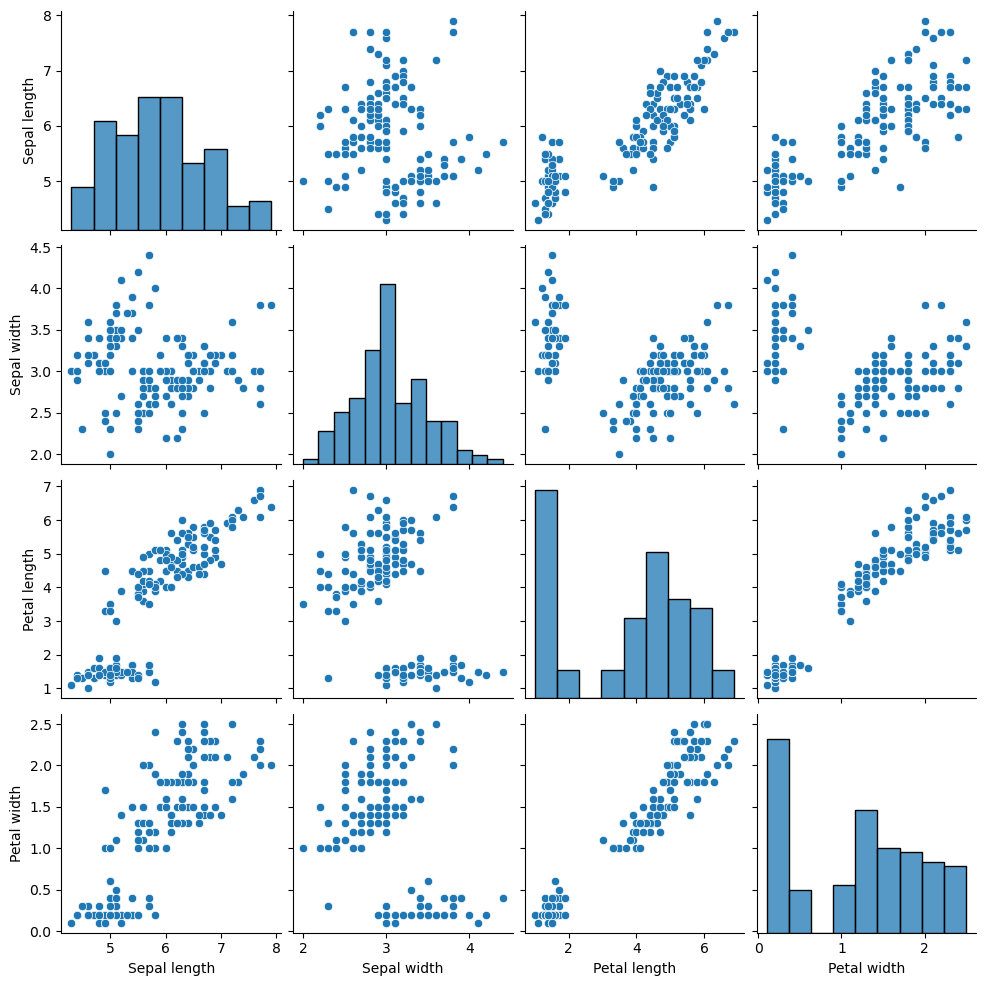

In [56]:
sns.pairplot(df, vars=['Sepal length', 'Sepal width', 'Petal length', 'Petal width'])

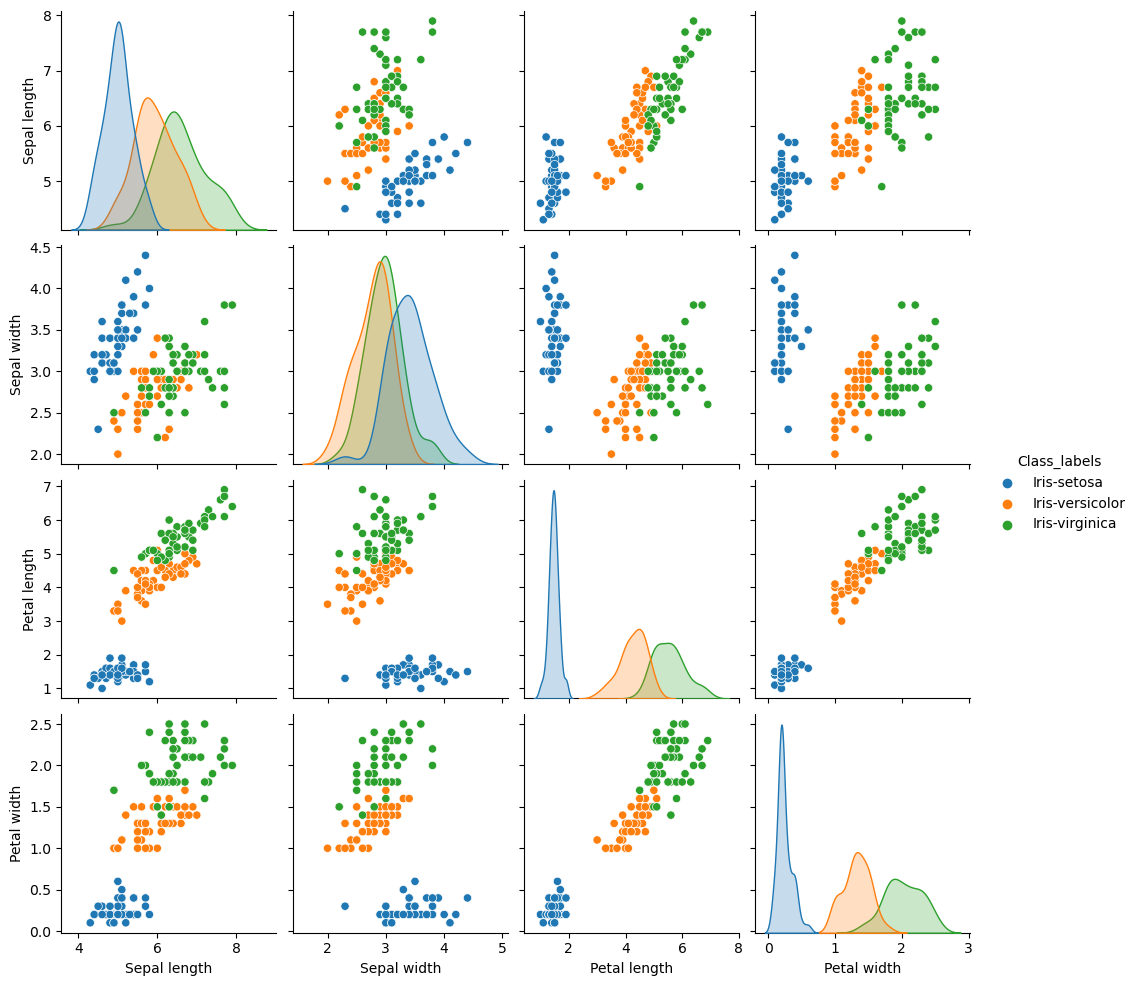

In [38]:
sns.pairplot(df, hue='Class_labels')

In [39]:
data = df.values
X = data[:,0:4]
Y = data[:,4]

In [41]:
Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1])
 for j in (np.unique(Y))])
Y_Data_reshaped = Y_Data.reshape(4, 3)
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)
X_axis = np.arange(len(columns)-1)
width = 0.3

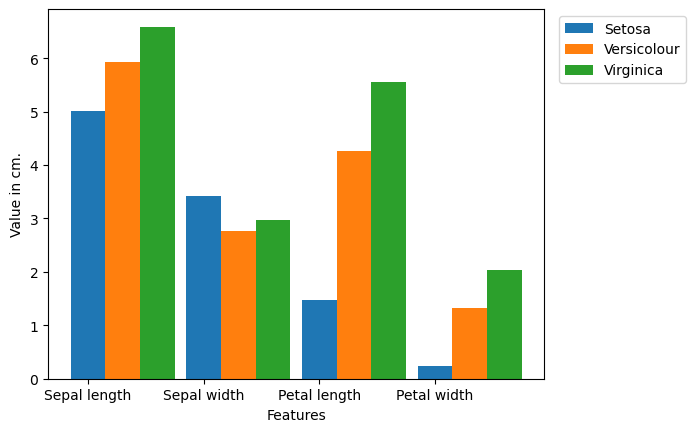

In [42]:
plt.bar(X_axis, Y_Data_reshaped[0], width, label = 'Setosa')
plt.bar(X_axis+width, Y_Data_reshaped[1], width, label = 'Versicolour')
plt.bar(X_axis+width*2, Y_Data_reshaped[2], width, label = 'Virginica')
plt.xticks(X_axis, columns[:4])
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [44]:
from sklearn.svm import SVC
svn = SVC()
svn.fit(X_train, y_train)

SVC()

In [45]:
predictions = svn.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

1.0

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [55]:
X_new = np.array([[2, 3, 1.2, 0.2], [  4.9, 2.2, 3.6, 1.3 ], [  5.4, 2.3, 4.9, 1.9 ]])
#Prediction of the species from the input vector
prediction = svn.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [57]:
X_new = np.array([[5.4, 3.2, 1.2, 0.2], [  0.2, 1.2, 3.6, 1.0 ], [  0.3, 2.0, 9.9, 0.2 ]])
#Prediction of the species from the input vector
prediction = svn.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-virginica' 'Iris-virginica']
